In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

cusi = pd.read_table('data/cusi81119.dat', header=3, dtype=np.float64)


In [2]:

si_T = cusi['Temperatur']
si_R = cusi['R_Probe_2']

si_cut_T = si_T[si_R < (si_R.max())]
si_cut_R = si_R[si_R < (si_R.max())]


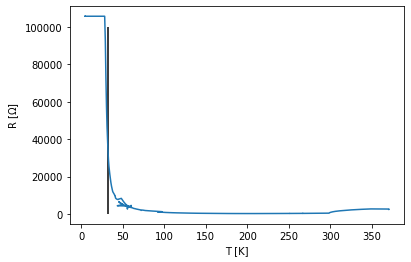

In [3]:

plt.plot(si_T, si_R)
plt.xlabel('T [K]')
plt.ylabel('R [$\Omega$]')
plt.vlines(32, 0, 100000)
plt.savefig('images/r_siliz.png', dpi=300)


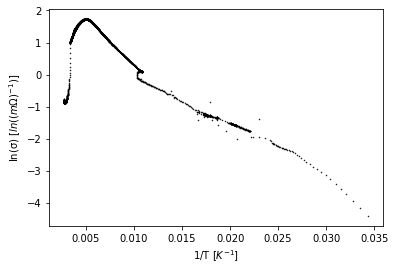

In [4]:

l = 5e-3
A = 9e-3 * 0.5e-3
rho = l/(A*si_cut_R)
lnrho = np.log(rho)
plt.plot(1/si_cut_T, lnrho, '.k', markersize=1)
plt.xlabel('1/T [$K^{-1}$]')
plt.ylabel('ln(σ) [$ln((m\Omega)^{-1})$]')
plt.savefig('images/lnsigma.png', dpi=300)


Bandlückenenergie: 5.806667813246069e-21 Joule
Bandlückenenergie: 0.03624236984875457 eV ± 0.00017261133577145928 eV


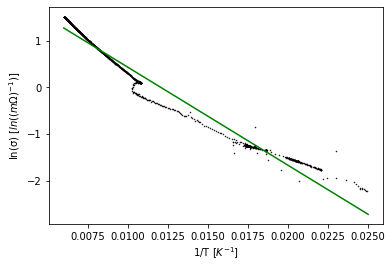

In [5]:

T_min = 0.006
T_max = 0.025
T_plot_num = 1000
k_B = 1.380649e-23

T_inv_fit_cut = (1/si_cut_T)[1/(si_cut_T) > T_min][1/(si_cut_T) < T_max]
lnrho_fit_cut = lnrho[1/(si_cut_T) > T_min][1/(si_cut_T) < T_max]

plt.plot(T_inv_fit_cut, lnrho_fit_cut, '.k', markersize=1)

def linear(x,a,b):
    return a*x+b

linfit, linfit_std = curve_fit(linear, T_inv_fit_cut, lnrho_fit_cut)
err = (np.sqrt(np.diag(linfit_std))[0])*2*k_B/(1.602176634e-19)

plt.plot(np.linspace(T_min, T_max, T_plot_num), linear(np.linspace(T_min, T_max, T_plot_num), linfit[0], linfit[1]), '-g')

E_g_J = -linfit[0]*2*k_B
print('Bandlückenenergie:',E_g_J,'Joule')
E_g_eV = E_g_J/(1.602176634e-19)
print('Bandlückenenergie:',E_g_eV,'eV ±',err,'eV')

plt.xlabel('1/T [$K^{-1}$]')
plt.ylabel('ln(σ) [$ln((m\Omega)^{-1})$]')
plt.savefig('images/bandluecken_fit.png', dpi=300)


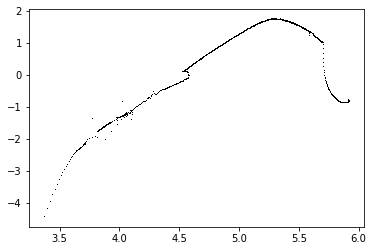

In [6]:

plt.plot(np.log(si_cut_T), lnrho, ',k')